# Проверка гипотез для интернет-магазина


**Содержание** 
<a id=0> </a>

[Введение](#1)  
[Приоретизация гипотез](#2)  
[Предобработка данных](#3)   
[Анализ А/В-теста](#4)  
[Решение](#5)  
[Вывод](#6)

## Введение
<a id=1> </a>

Нашему интернет-магазину понадобилось срочно повысить выручку. Для этого мы разработали восесьмь гипотез, которые собираемся проверить в ходе данного исследования при помощи A/B-тестирований. Т.к. наш бюджет и время ограничены, для начала мы выполним приоретизацию гипотез.

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np

import datetime as dt
from datetime import date, time, timedelta

from scipy import stats
import math as mth

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# загрузим файлы
try:
    hypothesis = pd.read_csv('/Users/09e6y/Desktop/Катькис/Практикум/Проект 7 make decision/hypothesis.csv')
    orders = pd.read_csv('/Users/09e6y/Desktop/Катькис/Практикум/Проект 7 make decision/orders.csv')
    visitors = pd.read_csv('/Users/09e6y/Desktop/Катькис/Практикум/Проект 7 make decision/visitors.csv')
except FileNotFoundError:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

## Приоретизация гипотез
<a id=2> </a>

Поскольку время и бюджет на проверку гипотез ограничены, да и не имеет смысл проверять все подряд, выполним приоретизацию гипотез, используя фреймворки ICE и RICE.

In [3]:
pd.set_option('display.max_colwidth', None) # отобразим всю строку целиком
hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Для определения приоритетных гипотез воспользуемся следующими формулами:

$$ICE = \frac{Impact*Confidence}{Efforts}$$

$$RICE = \frac{Reach*Impact*Confidence}{Efforts}$$

In [4]:
# добавим колонку с вычисленным значением ICE
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/ hypothesis['Efforts']
# отсортируем данные по убыванию
print(hypothesis[['Hypothesis', 'ICE']].sort_values(by= 'ICE', ascending = False))


                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Больше всего баллов набрали гипотезы 8, 0 и 7, но пока рано приступать к анализу, нам необходимо учесть так же параметр охвата, поэтому применим так же фрэймворк RICE.

In [5]:
# добавим к вычислениям параметр Reach
hypothesis['RICE'] = hypothesis['ICE']* hypothesis['Reach']
# отсортируем даннные по убыванию
print(hypothesis[['Hypothesis', 'RICE', 'ICE']].sort_values(by= 'RICE', ascending = False))


                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Здесь на первом месте гипотеза 7, при чем с большим отрывом, а за ней следуют 2, 0 и 6.
7 гипотеза будет иметь больший охват (ее воплощение увидят все пользователи вообще), но при этом легка в исполнении - поэтому она получила максимальный статус. А еще ее исполнение позволит нам собрать важные данные для компании.


## Предобработка данных
<a id=3> </a>

Посмотрим на наши данные.

In [6]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропусков нет, форматы данных совпадают с заявленными, формат даты мы поменяем чуть позже. Проверим так же на наличие дубликатов.

In [7]:
orders.duplicated().sum()


0

Дубликатов не обнаружено. Данные готовы к тестированию.

[Содержание](#0)

## Анализ А/В-теста
<a id=4> </a>

Согласно выбранным ранее гипотезам мы провели А/В-тест и теперь должны проанализировать его результаты.

Для начала посмотрим, не было ли среди наших данных пользоватлей, которые случайно попали в обе группы теста.

In [8]:
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
# разделим датафрейм на две части по группе и смерджим обратно, используя visitorId
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')
# используем тип объединения inner, чтобы в объединенный датасет попали только id, которые есть в обеих группах. 
orders_id = orders_a.merge(orders_b, on='visitorId', how='inner') 

orders_id


,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


In [10]:
# выберем уникальные id
id_list = orders_id['visitorId'].unique()
display(id_list)
len(id_list)


array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295])

58

Таки id - 58. Удалим таких пользователей из наших данных - они будут искажать результаты исследования.

In [11]:
# отфильтруем исходный датафрем по id
orders = orders[~orders['visitorId'].isin(id_list)]
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Для того чтобы визуализировать наши данные, нужно посчитать кумулятивные метрики ARPU, ARPPU и конверсию (CR). Данные для метрик возьмем из датафрейма orders.

In [12]:
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Посмотрим, сколько человек в каждой группе.

In [13]:
ab_totals = orders.groupby('group', as_index=False)['visitorId'].agg({'visitorId' : 'nunique'})
ab_totals.rename(columns={'visitorId': 'total_users'}, inplace=True)
ab_totals


,group,total_users
0,A,445
1,B,528


In [14]:
ab_totals = visitors.groupby('group', as_index=False)['visitors'].agg({'visitors' : 'sum'})
ab_totals.rename(columns={'visitors': 'total_users'}, inplace=True)
ab_totals


,group,total_users
0,A,18736
1,B,18916


In [15]:
# создадим техническую таблицу, в которой будут только даты и названия группы
dates_groups = (
    orders[['date', 'group']]
    .drop_duplicates() # удалим дубликаты
    .dropna() # удалим пропуски
    .sort_values(by = ['date', 'group']) # отсортируем по дате
    .reset_index(drop=True) # сбросим индексы
)
display(dates_groups.head())
dates_groups.shape # проверим размер таблицы


,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A


(62, 2)

В таблице 62 строки - что соответствует сроку с 1 по 31 августа *2 (у нас 2 группы).

In [16]:
# напишем функцию, которая соберет куммулятивное ревеню по всем пользователям, участвующим в тесте
def cum_data(x):
    data = orders[
        np.logical_and(
            orders['date'] <= x['date'], 
            orders['group'] == x['group']
        )
    ]
    data = data.agg(
        {'date': 'max',
        'group': 'min',
        'visitorId': 'nunique',
        'revenue': 'sum'
        }
    )
    return data
cumulative = dates_groups.apply(cum_data, axis=1) # применим функцию к заготовленной таблице
cumulative.rename(columns={'visitorId': 'paid_users'}, inplace=True) # переименуем колонки
cumulative.head()

,date,group,paid_users,revenue
0,2019-08-01,A,19,142779
1,2019-08-01,B,17,59758
2,2019-08-02,A,36,234381
3,2019-08-02,B,39,221801
4,2019-08-03,A,60,346854


Добавим к нашему датафрейму общее количество пользователей, которое мы нашли ранее.


In [17]:
cumulative = cumulative.merge(ab_totals, on='group')
cumulative.head()


,date,group,paid_users,revenue,total_users
0,2019-08-01,A,19,142779,18736
1,2019-08-02,A,36,234381,18736
2,2019-08-03,A,60,346854,18736
3,2019-08-04,A,71,388030,18736
4,2019-08-05,A,92,474413,18736


### Кумулятивная выручка

Теперь мы можем рассчитать кумулятивные метрики ARPU, ARPPU и конверсию.

In [18]:
cumulative['arpu'] = cumulative['revenue']/cumulative['total_users']
cumulative['arppu'] = cumulative['revenue']/ cumulative['paid_users']
cumulative['cr'] = cumulative['paid_users']/ cumulative['total_users']
cumulative.head()


,date,group,paid_users,revenue,total_users,arpu,arppu,cr
0,2019-08-01,A,19,142779,18736,7.620570,7514.684211,0.001014
1,2019-08-02,A,36,234381,18736,12.509661,6510.583333,0.001921
2,2019-08-03,A,60,346854,18736,18.512703,5780.900000,0.003202
3,2019-08-04,A,71,388030,18736,20.710397,5465.211268,0.003789
4,2019-08-05,A,92,474413,18736,25.320933,5156.663043,0.004910


In [19]:
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Немного обработаем наш датафрейм, чтобы потом нарисовать графики.

In [20]:
# разделим датафрейм на 2 части по группе, и потом соединим вместе, но чтобы a и b в итоге оказались в одной стоке
cumulative_a = cumulative[cumulative['group'] == 'A']
cumulative_b = cumulative[cumulative['group'] == 'B']
cumulative_new = cumulative_a.merge(
    cumulative_b, 
    on='date',
    suffixes = ('_a', '_b')
)
cumulative_new['date'] = pd.to_datetime(cumulative_new['date']) # поменяем формат времени
cumulative_new.head()


,date,group_a,paid_users_a,revenue_a,total_users_a,arpu_a,arppu_a,cr_a,group_b,paid_users_b,revenue_b,total_users_b,arpu_b,arppu_b,cr_b
0,2019-08-01,A,19,142779,18736,7.620570,7514.684211,0.001014,B,17,59758,18916,3.159125,3515.176471,0.000899
1,2019-08-02,A,36,234381,18736,12.509661,6510.583333,0.001921,B,39,221801,18916,11.725576,5687.205128,0.002062
2,2019-08-03,A,60,346854,18736,18.512703,5780.900000,0.003202,B,53,288850,18916,15.270142,5450.000000,0.002802
3,2019-08-04,A,71,388030,18736,20.710397,5465.211268,0.003789,B,66,385740,18916,20.392261,5844.545455,0.003489
4,2019-08-05,A,92,474413,18736,25.320933,5156.663043,0.004910,B,87,475648,18916,25.145274,5467.218391,0.004599


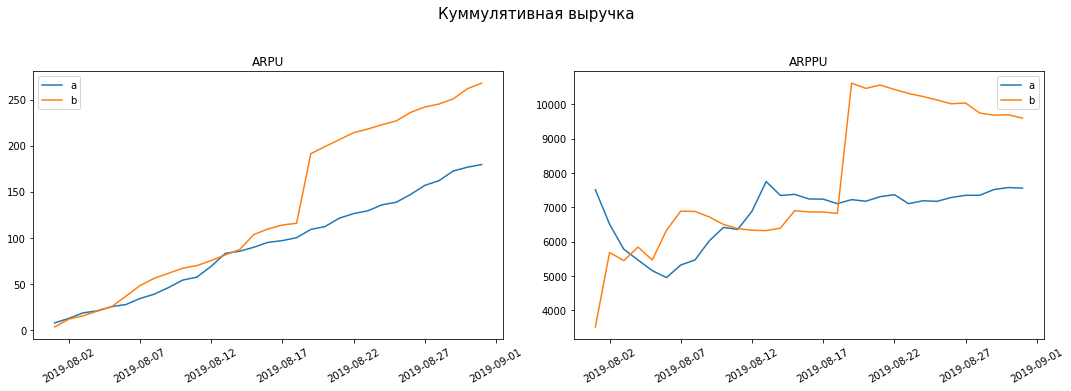

In [21]:
pd.plotting.register_matplotlib_converters()

locator = ticker.AutoLocator()
formatter = mdates.DateFormatter('%Y-%m-%d')
colors = ['tab:blue', 'tab:orange']

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5.5))

ax[0].set_title('ARPU')
ax[0].plot('date', 'arpu_a', data=cumulative_new, label='a')
ax[0].plot('date', 'arpu_b', data=cumulative_new, label='b')
ax[0].xaxis.set_major_locator(locator)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].xaxis.set_tick_params(rotation=30)
ax[0].legend()

ax[1].set_title('ARPPU')
ax[1].plot('date', 'arppu_a', data=cumulative_new, label='a')
ax[1].plot('date', 'arppu_b', data=cumulative_new, label='b')
ax[1].xaxis.set_major_locator(locator)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].xaxis.set_tick_params(rotation=30)
ax[1].legend()

fig.suptitle('Куммулятивная выручка', fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 0.95])


Средняя выручка у группы B ощутимо выше, особенно когда мы смотрим на платящих пользователей. Особенно большой прирост виден в середине месяца. Возможно, тестируемая фича отлично сказалась на желании пользователей покупать наши продукты, но с другой стороны, мы видим резкий всплеск, так что возможно в данных просто были выбросы с экстремально длорогими заказами, что могло исказить данные.

### Кумулятивная конверсия

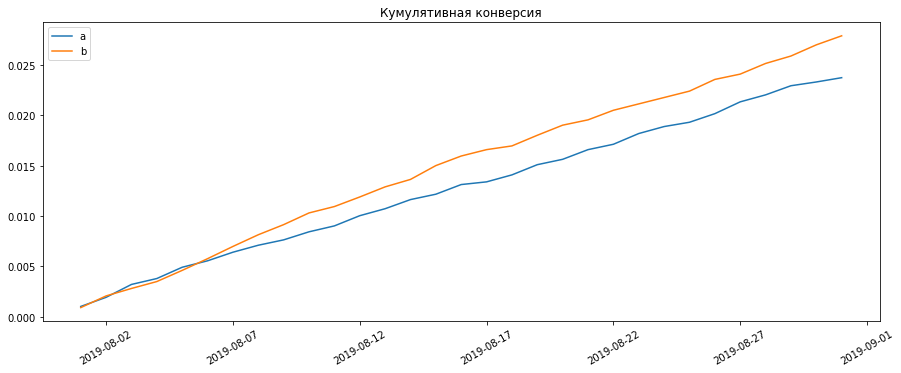

In [22]:
pd.plotting.register_matplotlib_converters()

locator = ticker.AutoLocator()
formatter = mdates.DateFormatter('%Y-%m-%d')
colors = ['tab:blue', 'tab:orange']

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,5.5))
ax.set_title('Кумулятивная конверсия')
ax.plot('date', 'cr_a', data=cumulative_new, label='a')
ax.plot('date', 'cr_b', data=cumulative_new, label='b')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30)
ax.legend();

<a class="anchor" id="23-bullet"></a>

Конверсия в группе В видимым образом превышает конверсию группы А.

Посмотрим на относительное изменение конверсии. 


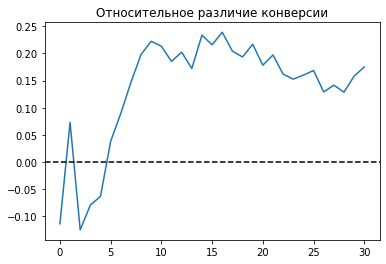

In [23]:
# cтроим отношение конверсии
plt.plot(cumulative_new['cr_b']/cumulative_new['cr_a']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное различие конверсии');


Здесь так же конверсия группы B стабильно выше группы А.

### Кумулятивный средний чек


In [24]:
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [25]:
# напишем функцию, которая соберет куммулятивный средний чек по всем пользователям, участвующим в тесте
def cum_data(x):
    data = orders[
        np.logical_and(
            orders['date'] <= x['date'], 
            orders['group'] == x['group']
        )
    ]
    data = data.agg(
        {'date': 'max',
        'group': 'min',
        'visitorId': 'nunique',
        'revenue': 'sum',
        'transactionId': 'count'
        }
    )
    return data
cumulative_avg = dates_groups.apply(cum_data, axis=1) # применим функцию к заготовленной таблице
cumulative_avg.rename(columns={'visitorId': 'paid_users'}, inplace=True) # переименуем колонки
# добавим колонку с кумулятивным средним чеком
cumulative_avg['avg_revenue'] = cumulative_avg['revenue']/cumulative_avg['transactionId']
cumulative_avg.head()


,date,group,paid_users,revenue,transactionId,avg_revenue
0,2019-08-01,A,19,142779,23,6207.782609
1,2019-08-01,B,17,59758,17,3515.176471
2,2019-08-02,A,36,234381,42,5580.500000
3,2019-08-02,B,39,221801,40,5545.025000
4,2019-08-03,A,60,346854,66,5255.363636


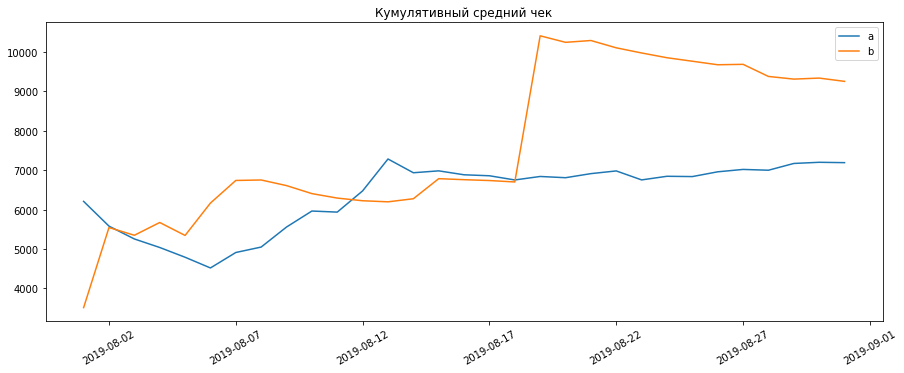

In [26]:
# нарисуем график кумулятивного среднего чека
# обработаем данные как делали ранее

# разделим датафрейм на 2 части по группе, и потом соединим вместе, но чтобы a и b в итоге оказались в одной стоке
cumulative_a = cumulative_avg[cumulative_avg['group'] == 'A']
cumulative_b = cumulative_avg[cumulative_avg['group'] == 'B']
cumulative_new = cumulative_a.merge(
    cumulative_b, 
    on='date',
    suffixes = ('_a', '_b')
)
cumulative_new['date'] = pd.to_datetime(cumulative_new['date']) # поменяем формат времени
cumulative_new.head()

pd.plotting.register_matplotlib_converters()

locator = ticker.AutoLocator()
formatter = mdates.DateFormatter('%Y-%m-%d')
colors = ['tab:blue', 'tab:orange']

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(15,5.5))
ax.set_title('Кумулятивный средний чек')
ax.plot('date', 'avg_revenue_a', data=cumulative_new, label='a')
ax.plot('date', 'avg_revenue_b', data=cumulative_new, label='b')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30)
ax.legend();

Средний чек в группе В так же стабильно выше.
И опять мы видим резкий скачок в районе середины месяца - видимо там были какие-то крупные заказы, которые сильно повдияли на результат. 

Посмотрим на относительные различия среднего чека между группами A и В. 


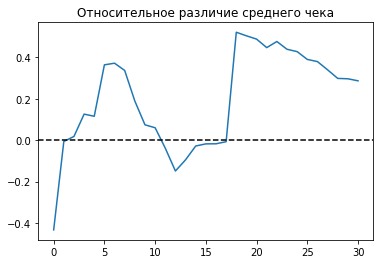

In [27]:
# cтроим отношение средних чеков
plt.plot(cumulative_new['avg_revenue_b']/cumulative_new['avg_revenue_a']-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное различие среднего чека');

B и по этой метрике выходит вперед, но до середины месяца данные нестабильные. 

In [28]:
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


[Содержание](#0)

### Крайние значения данных

Проанализируем выбросы и крайние значения. Возможно среди наших данных есть слишком дорогие заказы и они могут искажать данные.

#### Количество заказов на пользователя. Выбросы

In [29]:
# сгруппируем датасет по количеству заказов на пользователя
orders_user = orders.groupby('visitorId').agg({'transactionId':'count'})
orders_user.head()


,transactionId
visitorId,
5114589,1
6958315,1
11685486,1
39475350,1
47206413,1


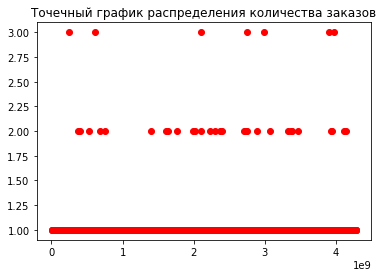

In [30]:
plt.plot(orders_user, 'ro')
plt.title('Точечный график распределения количества заказов');


In [31]:
# посчитаем 95 и 99 персентили
print(np.percentile(orders_user['transactionId'], [95, 99]))


[1. 2.]


Почти все пользователи сделали не более 1 заказа и не более 1% - по 2 заказа. Если смотреть на график - есть пользователи, которые сделали 3 заказа - и такие данные можно считать выбросами, т.к. они еще меньше 1%.

#### Стоимость заказов на пользователя. Выбросы

In [32]:
revenue_user = orders.groupby('visitorId').agg({'revenue':'sum'})
revenue_user.head()


,revenue
visitorId,
5114589,570
6958315,1490
11685486,6201
39475350,3990
47206413,730


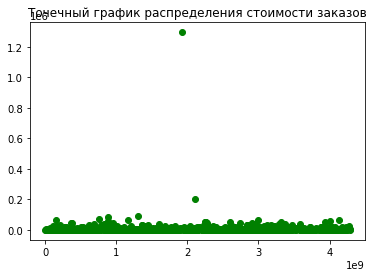

In [33]:
plt.plot(revenue_user, 'go')
plt.title('Точечный график распределения стоимости заказов');


In [34]:
# посчитаем 95 и 99 персентили
print(np.percentile(revenue_user['revenue'], [95, 99]))


[28910. 59082.]


95% заказов не превышают 28910, и есть экстремально-дорогие заказы на сумму более 59000. Будем считать границей выбросов 28000.



### Подсчет статистической значимости. "Сырые" данные

Прежде чем сделать выводы, прошел ли А/В-тест удачно, посчитаем статистическую значимость.

 Обработаем заново данные для того, чтобы получить 2 выборки.

In [35]:
#visitors['date'] = visitors['date'].map(
    #lambda x: dt.datetime.strptime(x, '%Y/%m/%d') # поменяем формат времени
#)

#orders['date'] = orders['date'].map(
   # lambda x: dt.datetime.strptime(x, '%Y/%m/%d') # поменяем формат времени
#)

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] # посчитаем количество посетителей за каждый день
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply( # кумулятивные посетители за каждый день
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] # переименуем колонки

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']] # то же для группы В
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = ( # количество транзакций за день
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA'] # переименуем колонки

ordersACummulative = ordersADaily.apply( # кумулятивные покупки
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date']) # отсортируем по дате, переименуем колонки
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = ( # повторим тот же код для группы В
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB'] # переименуем колонки

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = ( # объединим все в один датасет
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, on='date', how='left')
    .merge(ordersBCummulative, on='date', how='left')
    .merge(visitorsADaily, on='date', how='left')
    .merge(visitorsBDaily, on='date', how='left')
    .merge(visitorsACummulative, on='date', how='left')
    .merge(visitorsBCummulative, on='date', how='left')
)

print(data.head(5))

         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              23           142779              17   
1  2019-08-02              19            91602              23   
2  2019-08-03              24           112473              14   
3  2019-08-04              11            41176              14   
4  2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54           

In [36]:
# создадим 2 переменные, в которые попадет количество заказов для каждого пользователя по 2 группам
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


#### Различие конверсии

Сформулируем нулевую гипотезу: значимого различия между конверсиями групп А и В нет. Альтернативная гипотеза: конверсии отличаются.

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [37]:

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<a class="anchor" id="21-bullet"></a>

In [38]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.011
0.160


На "сырых" данныx p-value 1%, это значит что у нас уже есть основание отвергруть нулевую гипотезу, результаты по конверсии группы B c большой вероятностью выше. Среднее значение конверсии в группе В выше на 16%.

#### Различие среднего чека

Нулевая гипотеза: средний чек в группах А и В не отличается, альтернативная: средние чеки в двух группах различаются.

In [39]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


0.829
0.287


p-value больше 80% - нет оснований отвергать нулевую гипотезу, средние чеки в группах А и В не отличаются, согласно тесту, но средний чек группы B выше среднего чека почти на 30%. Возможно, благодаря дорогим заказам.

[Содержание](#0)

### Подсчет статистической значимости. Очищенные данные

На предыдущем шаге мы зафиксировали выбросы в сумме заказа более 28000 и в количестве заказов больше 3 на человека. Удалим данные этих пользователей из исходного датасета, чтобы посчитать статистическую значимость по-новому.

Нулевая и альтернативная гипотезы останутся теми же.

In [40]:
orders = orders.query('revenue <= 28000') # отфильтруем по сумме заказа 


In [41]:
orders_user


,transactionId
visitorId,
5114589,1
6958315,1
11685486,1
39475350,1
47206413,1
...,...
4259830713,1
4278982564,1
4279090005,1


In [42]:
# найдем id пользователей, которые совершили больше 2 заказов
orders_user = orders_user.reset_index()
# отфильтруем по количеству транзакций и соберем уникальные значения в отдельный список
extrem_user = orders_user.query('transactionId > 2')['visitorId'].unique()  
extrem_user


array([ 249864742,  611059232, 2108163459, 2742574263, 2988190573,
       3908431265, 3967698036])

In [43]:
# удалим эти id
orders = orders[~orders['visitorId'].isin(extrem_user)]


#### Различие конверсии

Сформулируем нулевую гипотезу: значимого различия между конверсиями групп А и В нет. Альтернативная гипотеза: конверсии отличаются.

In [44]:
# заново создадим переменные уже по очищенным данным
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


In [45]:

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

<a class="anchor" id="22-bullet"></a>

In [46]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.010
0.186


P-value еще чуть меньше - вероятность того, что данные выборки A и В идетничны еще меньше. 

#### Различие среднего чека 

In [47]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


0.718
-0.029


И опять тест не позволяет нам отвергнуть нулевую гипотезу - p-value слишком большой, 72%. Средние чеки в группах практически идентичны.

[Содержание](#0)

## Решение
<a id=5> </a>

На основе статистических тестов мы определили, что с высокой долей вероятности:
- конверсия в группе В выше;
- средний чек примерно одинаковый.



## Вывод 
<a id=6> </a>

В ходе исследования мы проверили приоретизацию гипотез, чтобы понять какие именно изменения тестировать в первую очередь, чтобы увидеть максимальный результат на максимально большом охвате аудитории.  
Самое большое количество балллов получила гипотеза 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Возможно, ее мы и тестировали.  
Следующие после нее по значимости гипотезы:  
- 2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию. 

Далее было проведено A/B-тестирование. Мы выяснили что выборки равны и пользователи в группах разделены на равные доли. Так же очистили данные от пользователей, которые случайно попали в обе группы.

На основе обработанных данных мы построили графики ARPU, ARPPU и конверсии и сравнили динамику распределения по группам. Судя по визуализации, можем сказать, что группа В лидирует, мы проверили это при помощи статистических тестов на следующем этапе исследования. 

На следующем этапе мы проверили статистическую значимость обнаруженных ранее различий, сначала на "сырых" данных, а потом - на очищенных. Проверяли значимость в разнице конверсий и средних чеков. Мы обнаружили значимый рост конверсии в группе В, а средний чек не показал статистически значимого роста.
